# **Titanic Survival Prediction**

## **Import dataset & library**

In [1]:
!gdown 1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA

Downloading...
From: https://drive.google.com/uc?id=1SFWQ7Zi83Gff-RVrlHj0z4Llm1Nq4BBA
To: /content/titanic_modified_dataset.csv
100% 25.9k/25.9k [00:00<00:00, 9.85MB/s]


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
# Read dataset
dataset_path = '/content/titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col = 'PassengerId')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [23]:
# to array and split dataset
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:,:-1], dataset_arr[:,-1]

In [24]:
# Add bias into X
intercept = np.ones((X.shape[0],1))
X_b = np.concatenate((intercept, X), axis = 1)

In [25]:
# Split train, val, test
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size = val_size, random_state = random_state, shuffle = is_shuffle)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = test_size, random_state = random_state, shuffle = is_shuffle)


In [26]:
# StandardScaler data
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])

In [27]:
# Initiate function

# Sigmoid
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Predict
def predict(X, theta):
  dot_product = np.dot(X, theta)
  y_hat = sigmoid(dot_product)
  return y_hat

# Compute Loss
def compute_loss(y_hat, y):
  loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
  return loss

# Compute gradient
def compute_gradient(X, y, y_hat):
  gradient = np.dot(X.T, (y_hat - y)) / y.size
  return gradient

# Update weight
def update_theta(theta, gradient, lr):
  theta = theta - lr * gradient
  return theta

# Accuracy
def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta).round()
  accuracy = np.mean(y_hat == y)
  return accuracy

In [40]:
# Initiate weight
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

## **Training Model**

In [41]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    y_hat = predict(X_i, theta)

    train_loss = compute_loss(y_hat, y_i)

    gradient = compute_gradient(X_i, y_i, y_hat)

    theta = update_theta(theta, gradient, lr)

    train_batch_losses.append(train_loss)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
  train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
  val_batch_losses = sum(val_batch_losses) / len(val_batch_losses)
  val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

  train_accs.append(train_batch_acc)
  train_losses.append(train_batch_loss)
  val_accs.append(val_batch_acc)
  val_losses.append(val_batch_losses)

  print(f'\nEpoch: {epoch+1}: \tTrain Loss: {train_batch_loss:.4f} \tTrain Acc: {train_batch_acc:.4f} \tVal Loss: {val_batch_losses:.4f} \tVal Acc: {val_batch_acc:.4f}')


Epoch: 1: 	Train Loss: 0.7031 	Train Acc: 0.6562 	Val Loss: 0.5995 	Val Acc: 0.7105

Epoch: 2: 	Train Loss: 0.6698 	Train Acc: 0.6713 	Val Loss: 0.5820 	Val Acc: 0.7152

Epoch: 3: 	Train Loss: 0.6404 	Train Acc: 0.6849 	Val Loss: 0.5672 	Val Acc: 0.7195

Epoch: 4: 	Train Loss: 0.6145 	Train Acc: 0.6991 	Val Loss: 0.5546 	Val Acc: 0.7284

Epoch: 5: 	Train Loss: 0.5917 	Train Acc: 0.7057 	Val Loss: 0.5440 	Val Acc: 0.7436

Epoch: 6: 	Train Loss: 0.5717 	Train Acc: 0.7313 	Val Loss: 0.5351 	Val Acc: 0.7489

Epoch: 7: 	Train Loss: 0.5542 	Train Acc: 0.7470 	Val Loss: 0.5277 	Val Acc: 0.7443

Epoch: 8: 	Train Loss: 0.5389 	Train Acc: 0.7587 	Val Loss: 0.5216 	Val Acc: 0.7480

Epoch: 9: 	Train Loss: 0.5255 	Train Acc: 0.7655 	Val Loss: 0.5166 	Val Acc: 0.7443

Epoch: 10: 	Train Loss: 0.5138 	Train Acc: 0.7697 	Val Loss: 0.5126 	Val Acc: 0.7436

Epoch: 11: 	Train Loss: 0.5035 	Train Acc: 0.7727 	Val Loss: 0.5094 	Val Acc: 0.7499

Epoch: 12: 	Train Loss: 0.4946 	Train Acc: 0.7765 	Val Loss: 0

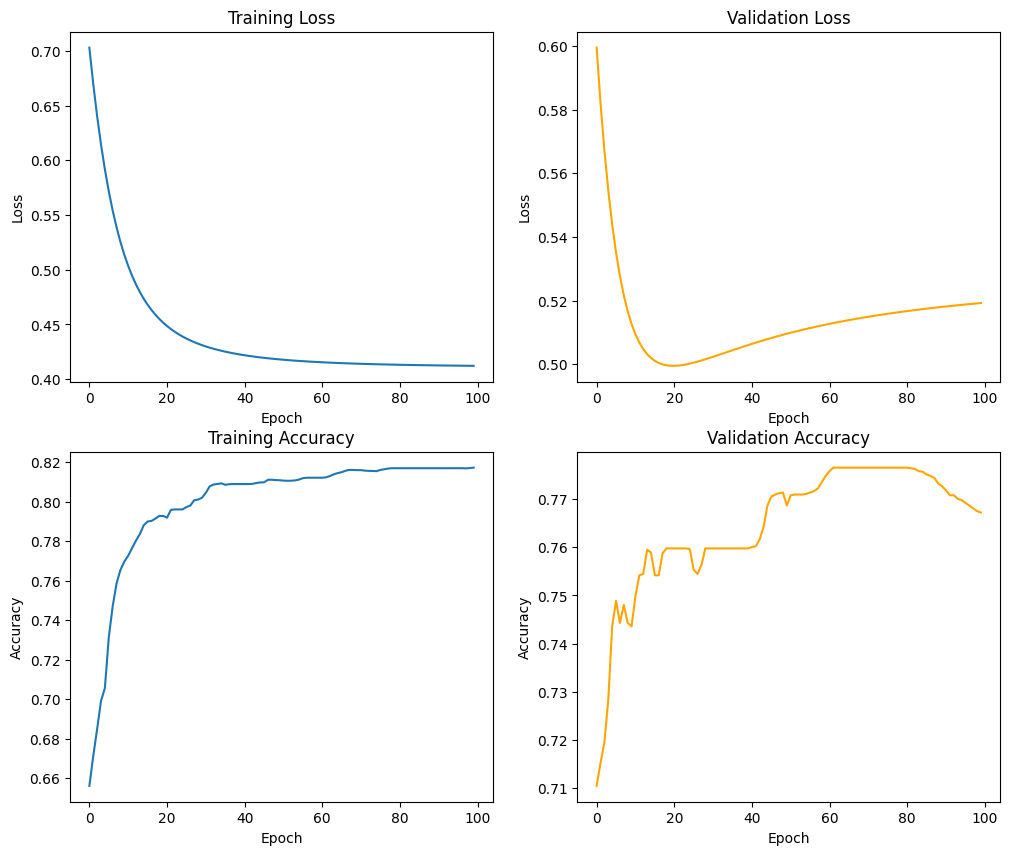

In [42]:
# Plot Show Results
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses,'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs, label='Train Acc')
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, label='Val Acc', color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [43]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print(f'Validation Set Accuracy: {val_set_acc:.4f}')
print(f'Test Set Accuracy: {test_set_acc:.4f}')

Validation Set Accuracy: 0.7709
Test Set Accuracy: 0.7753


# **Twitter Sentiment Analysis**

## **Import data and library**

In [44]:
!gdown 1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK

Downloading...
From: https://drive.google.com/uc?id=1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK
To: /content/sentiment_analysis.csv
100% 1.10M/1.10M [00:00<00:00, 121MB/s]


In [45]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

dataset_path = '/content/sentiment_analysis.csv'
df = pd.read_csv(dataset_path, index_col = 'id')
df

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...
...,...,...
7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7917,0,We would like to wish you an amazing day! Make...
7918,0,Helping my lovely 90 year old neighbor with he...


## **Preprocessing Data**

In [50]:
def text_normalize ( text ):
  # Retweet old acronym "RT" removal
  text = re.sub(r'^RT [\s]+', '', text )

  # Hyperlinks removal
  text = re.sub(r'https ?:\/\/.*[\r\n]*', '', text)

  # Hashtags removal
  text = re.sub(r'#', '', text )

  # Punctuation removal
  text = re.sub (r'[^\w\s]', '', text )

  # Tokenization
  tokenizer = TweetTokenizer (
        preserve_case =False ,
        strip_handles =True ,
        reduce_len =True
  )
  text_tokens = tokenizer.tokenize(text)

  return text_tokens

def get_freqs(df):
  freqs = defaultdict(lambda: 0)
  for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    tokens = text_normalize(tweet)
    for token in tokens:
      pair = (token, label)
      freqs[pair] += 1

  return freqs

def get_feature(text, freqs):
  tokens = text_normalize(text)
  x = np.zeros(3)
  x[0] = 1

  for token in tokens:
    x[1] += freqs[(token, 0)]
    x[2] += freqs[(token, 1)]

  return x

X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
  tweet = row['tweet']
  label = row['label']

  X_i = get_feature(tweet, freqs)
  X.append(X_i)
  y.append(label)

X = np.array(X)
y = np.array(y)

## **Split train, val, test**

In [ ]:
from operator import is_
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = val_size, random_state = random_state, shuffle = is_shuffle)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = test_size, random_state = random_state, shuffle = is_shuffle)

## **StandardScaler data**

In [51]:
normalizer = StandardScaler ()
X_train [:, 1:] = normalizer.fit_transform(X_train [:, 1:])
X_val [:, 1:] = normalizer.transform (X_val [:, 1:])
X_test [:, 1:] = normalizer.transform(X_test [:, 1:])

## **Initiate function**

In [52]:
# Sigmoid
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

# Predict
def predict(X, theta):
  dot_product = np.dot(X, theta)
  y_hat = sigmoid(dot_product)
  return y_hat

# Compute Loss
def compute_loss(y_hat, y):
  loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
  return loss

# Compute gradient
def compute_gradient(X, y, y_hat):
  gradient = np.dot(X.T, (y_hat - y)) / y.size
  return gradient

# Update weight
def update_theta(theta, gradient, lr):
  theta = theta - lr * gradient
  return theta

# Accuracy
def compute_accuracy(X, y, theta):
  y_hat = predict(X, theta).round()
  accuracy = np.mean(y_hat == y)
  return accuracy

In [53]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [55]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    y_hat = predict(X_i, theta)

    train_loss = compute_loss(y_hat, y_i)

    gradient = compute_gradient(X_i, y_i, y_hat)

    theta = update_theta(theta, gradient, lr)

    train_batch_losses.append(train_loss)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
  train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
  val_batch_losses = sum(val_batch_losses) / len(val_batch_losses)
  val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

  train_accs.append(train_batch_acc)
  train_losses.append(train_batch_loss)
  val_accs.append(val_batch_acc)
  val_losses.append(val_batch_losses)

  print(f'\nEpoch: {epoch+1}: \tTrain Loss: {train_batch_loss:.4f} \tTrain Acc: {train_batch_acc:.4f} \tVal Loss: {val_batch_losses:.4f} \tVal Acc: {val_batch_acc:.4f}')


Epoch: 1: 	Train Loss: 0.7228 	Train Acc: 0.6482 	Val Loss: 0.6074 	Val Acc: 0.7095

Epoch: 2: 	Train Loss: 0.7180 	Train Acc: 0.6514 	Val Loss: 0.6048 	Val Acc: 0.7095

Epoch: 3: 	Train Loss: 0.7132 	Train Acc: 0.6530 	Val Loss: 0.6023 	Val Acc: 0.7095

Epoch: 4: 	Train Loss: 0.7085 	Train Acc: 0.6555 	Val Loss: 0.5998 	Val Acc: 0.7095

Epoch: 5: 	Train Loss: 0.7039 	Train Acc: 0.6575 	Val Loss: 0.5974 	Val Acc: 0.7095

Epoch: 6: 	Train Loss: 0.6993 	Train Acc: 0.6604 	Val Loss: 0.5950 	Val Acc: 0.7106

Epoch: 7: 	Train Loss: 0.6948 	Train Acc: 0.6629 	Val Loss: 0.5927 	Val Acc: 0.7151

Epoch: 8: 	Train Loss: 0.6904 	Train Acc: 0.6645 	Val Loss: 0.5904 	Val Acc: 0.7151

Epoch: 9: 	Train Loss: 0.6861 	Train Acc: 0.6674 	Val Loss: 0.5882 	Val Acc: 0.7151

Epoch: 10: 	Train Loss: 0.6818 	Train Acc: 0.6684 	Val Loss: 0.5860 	Val Acc: 0.7151

Epoch: 11: 	Train Loss: 0.6776 	Train Acc: 0.6697 	Val Loss: 0.5838 	Val Acc: 0.7151

Epoch: 12: 	Train Loss: 0.6734 	Train Acc: 0.6722 	Val Loss: 0

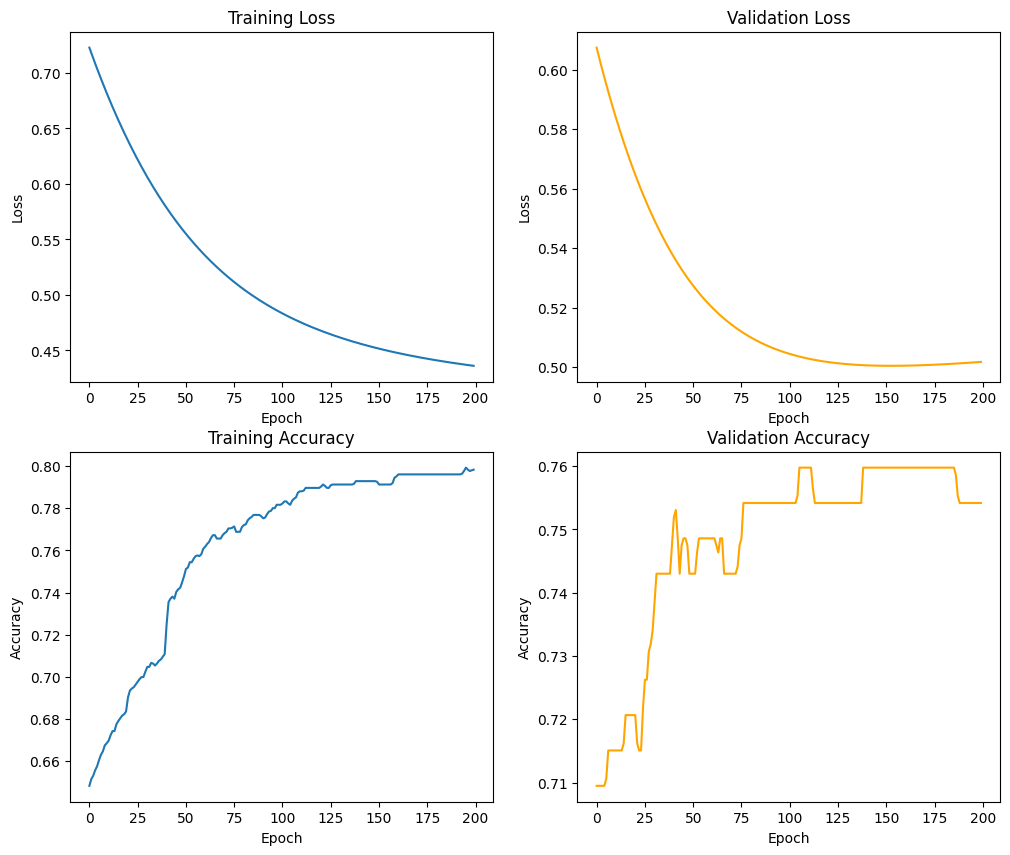

In [56]:
# Plot Show Results
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses,'orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs, label='Train Acc')
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, label='Val Acc', color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [57]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)
print(f'Validation Set Accuracy: {val_set_acc:.4f}')
print(f'Test Set Accuracy: {test_set_acc:.4f}')

Validation Set Accuracy: 0.7542
Test Set Accuracy: 0.7528
